In [53]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
seed = 42

In [54]:
# Load in the data
df = pd.read_csv("wine_quality.csv")

# Split into train and test sections
y = df.pop("quality")
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=seed)

In [55]:
regr = RandomForestRegressor(max_depth=2, random_state=seed)
regr.fit(X_train, y_train)

# Report training set score
train_score = regr.score(X_train, y_train) * 100
# Report test set score
test_score = regr.score(X_test, y_test) * 100

# Write scores to a file
with open("metrics.txt", 'w') as outfile:
        outfile.write("Training variance explained: %2.1f%%\n" % train_score)
        outfile.write("Test variance explained: %2.1f%%\n" % test_score)


In [56]:
# Calculate feature importance in random forest
importances = regr.feature_importances_
labels = df.columns
feature_df = pd.DataFrame(list(zip(labels, importances)), columns = ["feature","importance"])
feature_df = feature_df.sort_values(by='importance', ascending=False,)

# image formatting
axis_fs = 18 #fontsize
title_fs = 22 #fontsize
sns.set(style="whitegrid")

ax = sns.barplot(x="importance", y="feature", data=feature_df)
ax.set_xlabel('Importance',fontsize = axis_fs) 
ax.set_ylabel('Feature', fontsize = axis_fs)#ylabel
ax.set_title('Random forest\nfeature importance', fontsize = title_fs)

plt.tight_layout()
plt.savefig("feature_importance.png",dpi=120) 
plt.close()


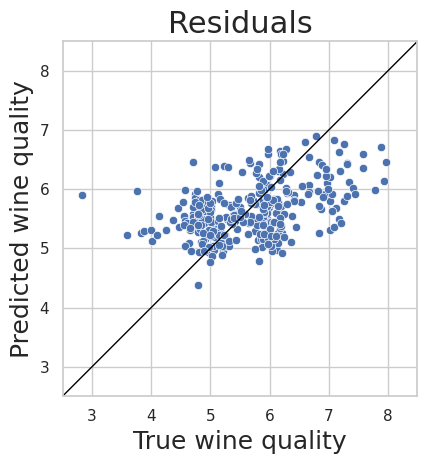

In [57]:
y_pred = regr.predict(X_test) + np.random.normal(0,0.25,len(y_test))
y_jitter = y_test + np.random.normal(0,0.25,len(y_test))
res_df = pd.DataFrame(list(zip(y_jitter,y_pred)), columns = ["true","pred"])

ax = sns.scatterplot(x="true", y="pred",data=res_df)
ax.set_aspect('equal')
ax.set_xlabel('True wine quality',fontsize = axis_fs) 
ax.set_ylabel('Predicted wine quality', fontsize = axis_fs)#ylabel
ax.set_title('Residuals', fontsize = title_fs)

# Make it pretty- square aspect ratio
ax.plot([1, 10], [1, 10], 'black', linewidth=1)
plt.ylim((2.5,8.5))
plt.xlim((2.5,8.5))

plt.tight_layout()
plt.savefig("residuals.png",dpi=120) 